In [178]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [180]:
#Numerical features to float types
df["Assault"]=df["Assault"].astype("float64")
df["UrbanPop"]=df["UrbanPop"].astype("float64")
df.dtypes

City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

In [181]:
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [182]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot: xlabel='City'>

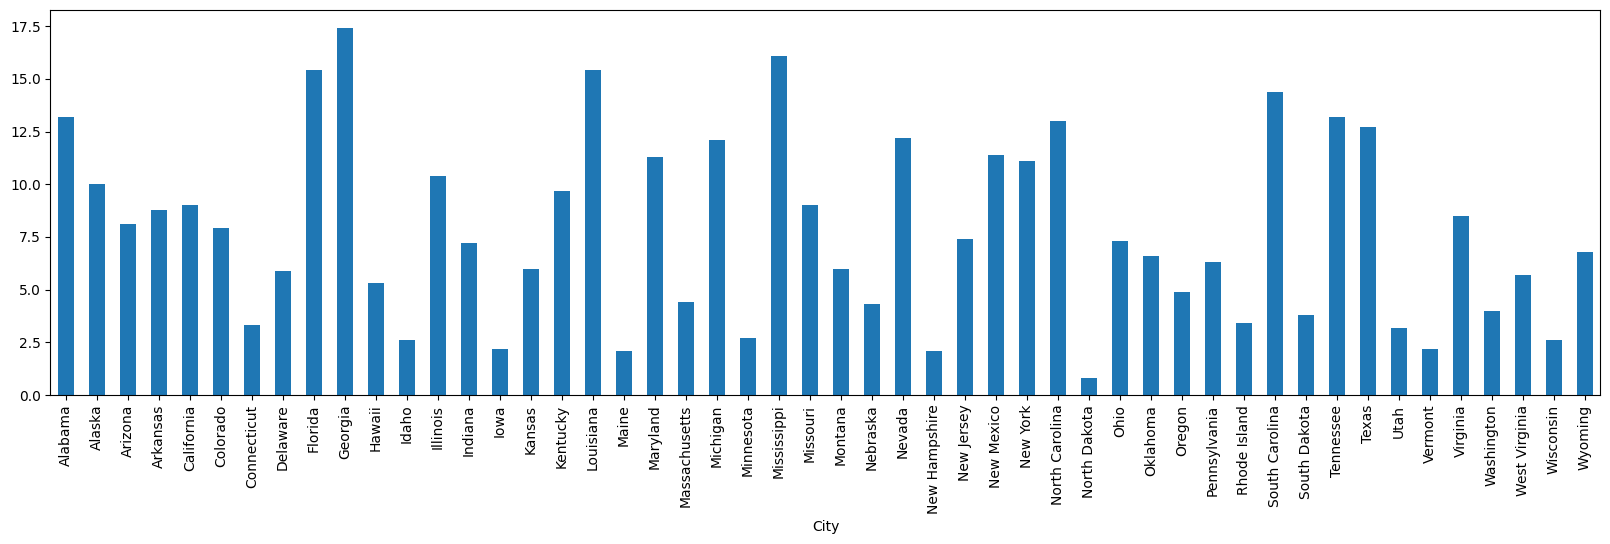

In [183]:
plt.figure(figsize=(20,5))
df.groupby('City')['Murder'].max().plot(kind='bar')

#Highest Murder Rate : Georgia and Missisippi
#Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

<AxesSubplot: xlabel='City'>

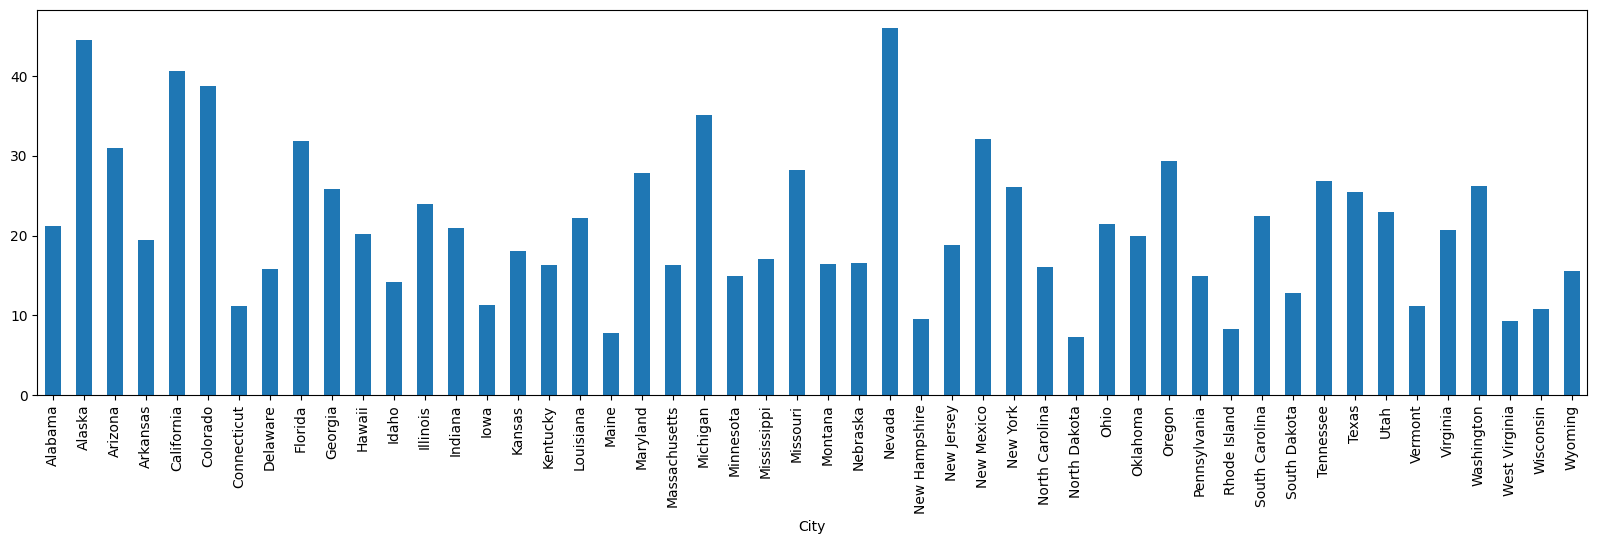

In [184]:
plt.figure(figsize=(20,5))
df.groupby('City')['Rape'].max().plot(kind='bar')
#Highest Rape Rate : Nevada and Alaska.
#Lowest Rape Rate : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

<AxesSubplot: xlabel='City'>

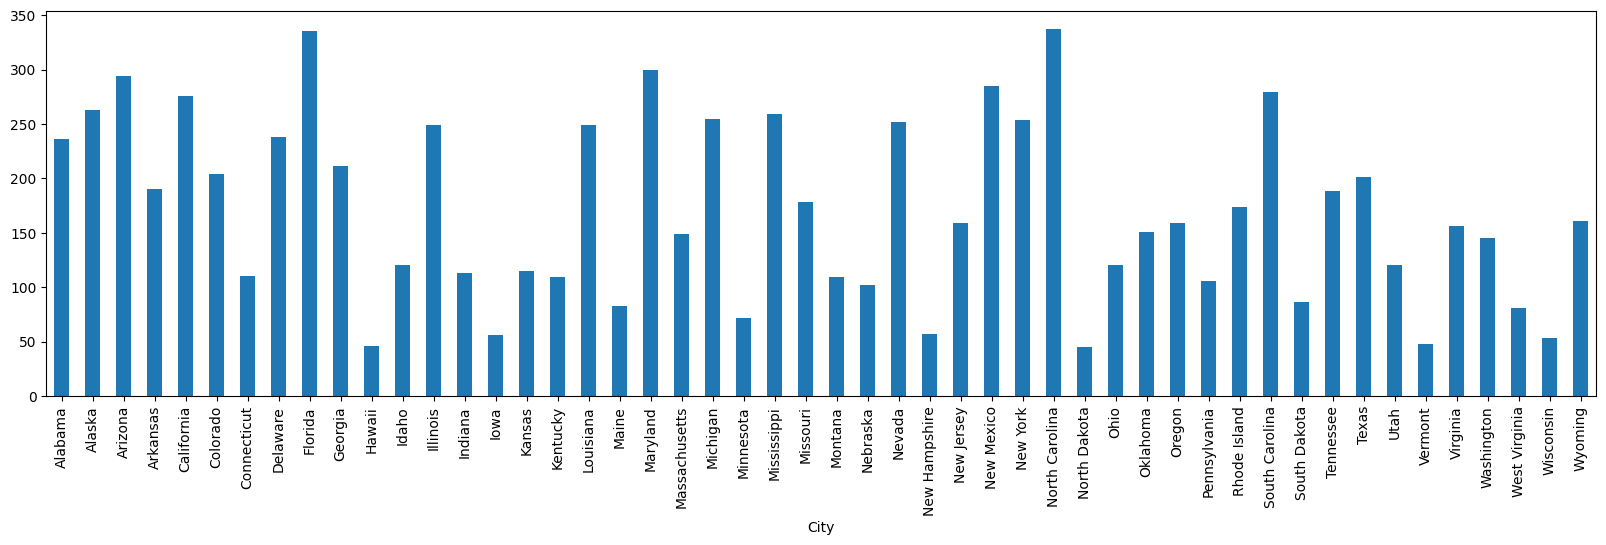

In [185]:
plt.figure(figsize=(20,5))
df.groupby('City')['Assault'].max().plot(kind='bar')
#Highest Assualt Rate : Florida and North California.
#Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.


C:\Users\nevil\AppData\Local\Temp\ipykernel_22296\3402655120.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Arrest_corr=df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

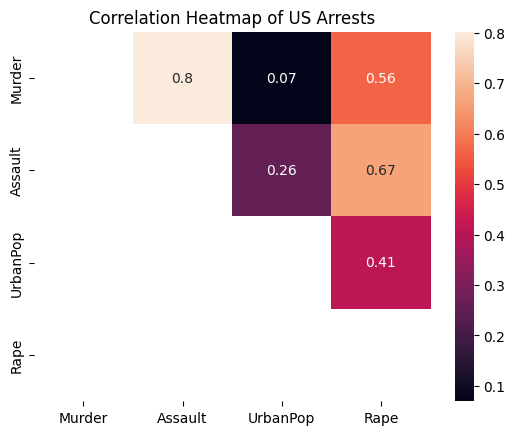

In [186]:
plt.Figure(figsize=(15,15))
Arrest_corr=df.corr()

dropmirror=np.zeros_like(Arrest_corr)
dropmirror[np.tril_indices_from(dropmirror)]=True

sns.heatmap(Arrest_corr, annot=True, mask=dropmirror)
plt.title("Correlation Heatmap of US Arrests")
plt.show

In [187]:
#Data Scaling

scaled=StandardScaler().fit_transform(df.iloc[:,1:5])
df_scale=pd.DataFrame(scaled,columns=df.columns[1:5])
df_scale.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


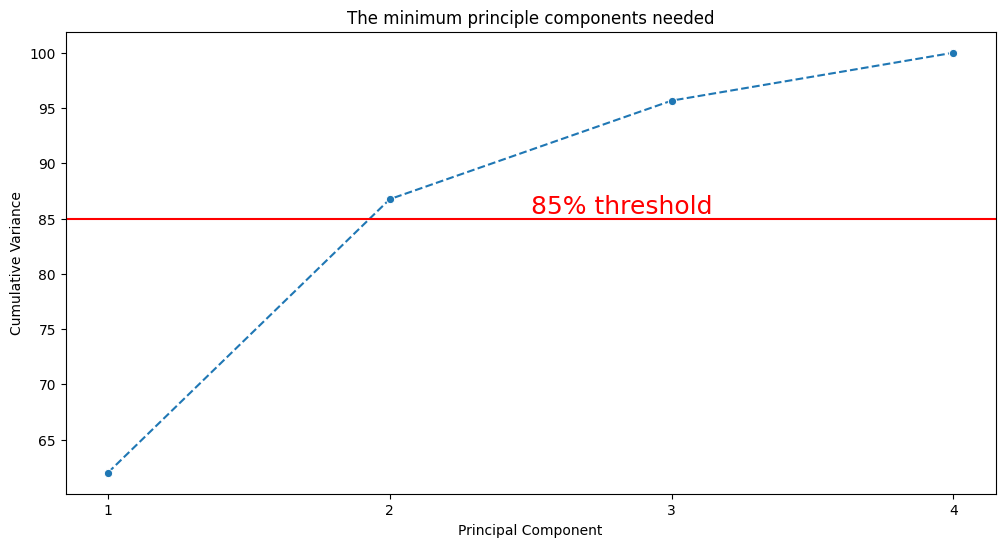

In [188]:
#Selecting number of components for PCA
pca=PCA().fit(df_scale)
pca.explained_variance_ratio_

#Creating a graph to show the miniumum number of components needed for our analysis
X=np.arange(1,5,step=1)
plt.figure(figsize=(12,6))
sns.lineplot(x=X,y=np.cumsum(pca.explained_variance_ratio_)*100,linestyle='--',marker='o')

plt.title("The minimum principle components needed")
plt.xlabel('Principal Component')
plt.xticks(np.arange(1,5,step=1))
plt.ylabel('Cumulative Variance')
plt.axhline(y=85,color='r',linestyle='-')
plt.text(2.5, 85.5,'85% threshold', color='red', fontsize=18)
plt.show()

#Absolute minimum threshold for variance should not be below 60%.
#The optimum level should be between 80% and 99%.
#From the graph 2 componets is needed


In [189]:
#number of components=2
pca=PCA(n_components=2)
PC= pca.fit_transform(df_scale)
PC.shape

PC_df=pd.DataFrame(data=PC,columns=['Principal Component 1','Principal Component 2'])
PC_df['City']=df['City']
PC_df.head()


,Principal Component 1,Principal Component 2,City
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


<AxesSubplot: title={'center': 'Variance Explained by principal components'}, xlabel='Principal Component', ylabel='variance explained'>

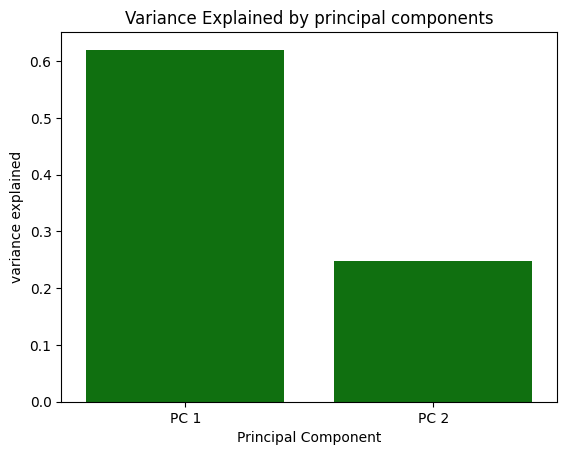

In [190]:
#Creating a bar plot to see how each component affects the variance

df=pd.DataFrame({'variance explained':pca.explained_variance_ratio_,'Principal Component':['PC 1','PC 2']})
plt.title('Variance Explained by principal components')
sns.barplot(x='Principal Component',y='variance explained',data=df, color='g')

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


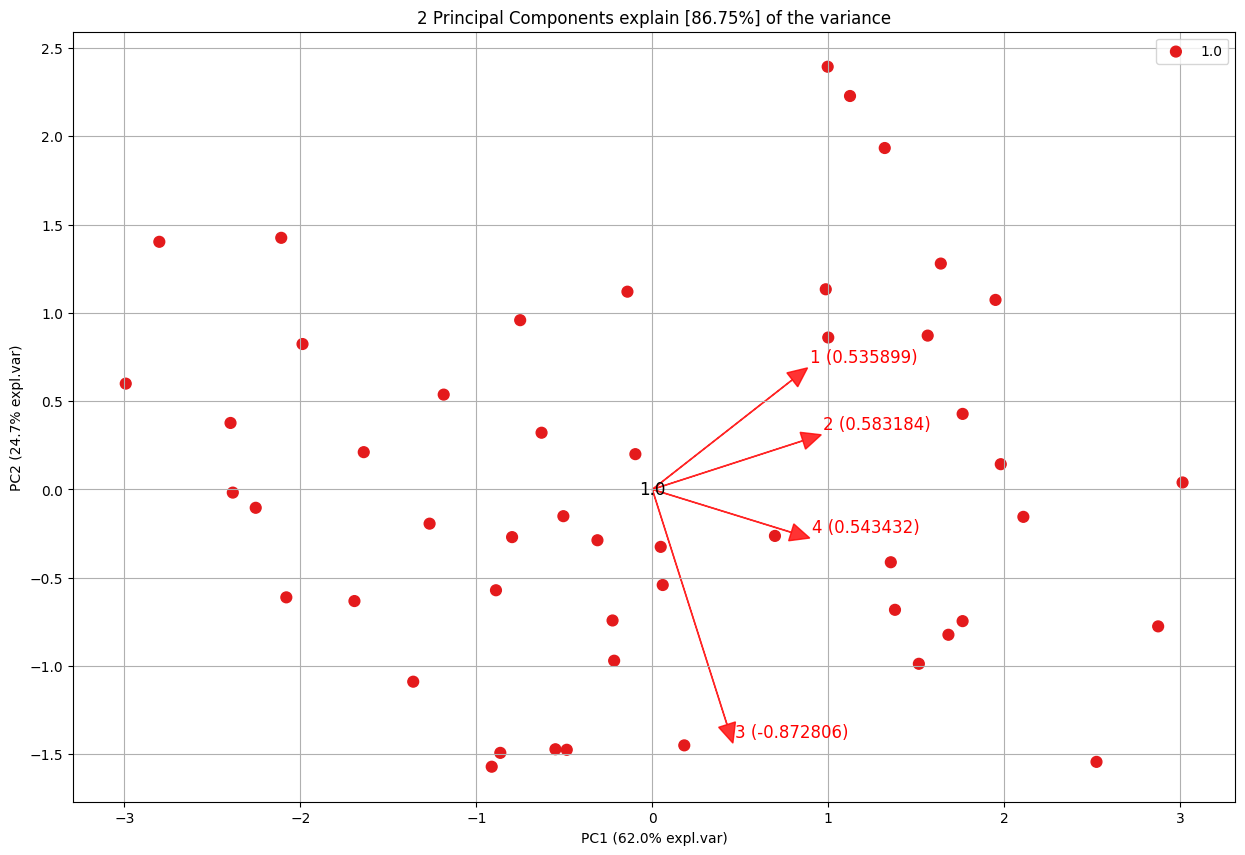

In [191]:
#Create a biplot to represent components within the total DataFrame
from pca import pca

model=pca(n_components=2)
results=model.fit_transform(scaled)
fig, ax=model.biplot(n_feat=4,)


Our data contains four variables, being murder, assault, rape and urban population. All four variables are shown on the above graph.

Each variable shown has had a positive correlation with the first principal component. The feature 'UrbanPop' has the relatively highest correlation with the 2nd principal component.


##First clustering technique


Text(0, 0.5, 'Murder Rate')

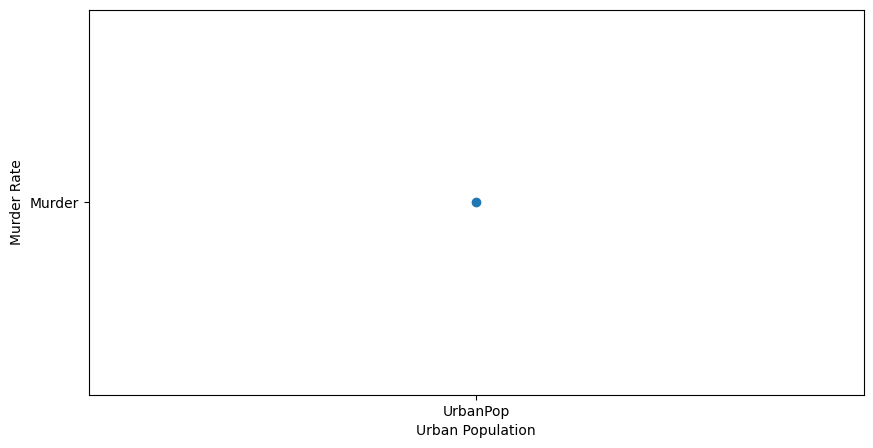

In [196]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

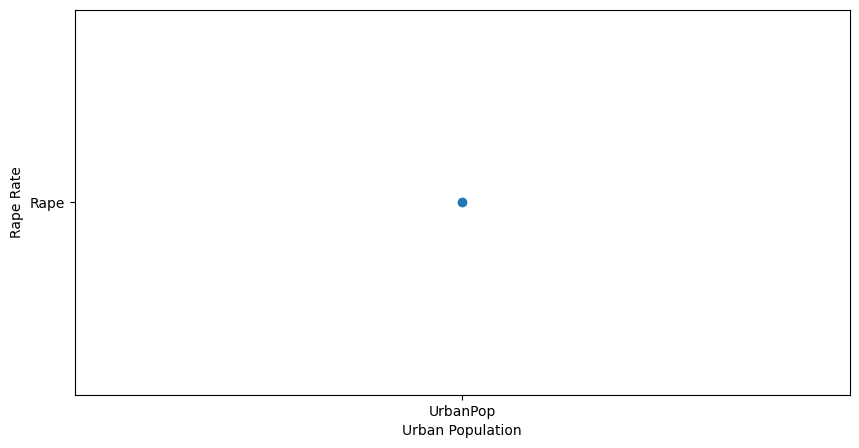

In [193]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

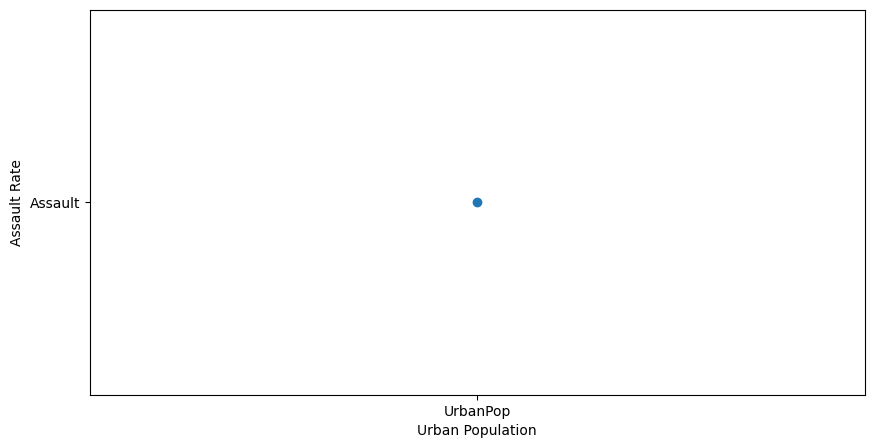

In [194]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

In [195]:
X = df[['UrbanPop', 'Murder']].values.reshape(-1,2)
print('Data size:')
print(X.shape)  


KeyError: "None of [Index(['UrbanPop', 'Murder'], dtype='object')] are in the [columns]"

In [ ]:
#Complete Linkage
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(X, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [ ]:
#Single Linkage
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(X, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [ ]:
#Average Linkage
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(X, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

We look for the largest distance that we can vertically to find the optimal number of clusters. Cluster number will be 3 for this dataset.
I choose Complete linkage.

In [ ]:
K=2
L = 'complete'

cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

##Second clustering technique


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

##Optimal number of clusters is 4.


In [ ]:
X1 = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X1.head()

In [ ]:
#Analysing the data pairwise - Murder & Assault
sns.relplot(data=df, x="Murder", y="Assault", hue="Crime_clusters")


In [ ]:
#Analysing the data pairwise - Murder & Rape
sns.relplot(data=df, x="Murder", y="Rape", hue="Crime_clusters")


In [ ]:
#Analysing the data pairwise - Assault & Rape
sns.relplot(data=df, x="Assault", y="Rape", hue="Crime_clusters")
